In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
no_mod_results = pd.read_csv('experiment_results.csv')
no_mod_results = no_mod_results.rename(columns={'percentage':'pct'})
no_mod_results.head()

,dataset,modification,pct,method,metric,value
0,Dancer 01,random asc,0.0,Louvain-igraph,P,9.000000
1,Dancer 01,random asc,0.0,Louvain-igraph,P*/P,0.666667
2,Dancer 01,random asc,0.0,Louvain-igraph,Modularity,0.649290
3,Dancer 01,random asc,0.0,Louvain-igraph,NMI,0.775724
4,Dancer 01,random asc,0.0,Fastgreedy,P,8.000000


In [3]:
no_mod_results['modification'].unique()

array(['random asc', 'betweenness asc', 'betweenness desc'], dtype=object)

In [48]:
# Load results from adding edges
#mod_results_folder = 'D:/Pablo/clases/UJM/2. Semester, 2021/Mining Uncertain Social Networks/Experiments/datasets/dancer_01/'
mod_results_folder = 'D:/Pablo/clases/UJM/2. Semester, 2021/Mining Uncertain Social Networks/Repository/Experiments/datasets/dancer_01/'

add_edges_results = pd.read_csv(mod_results_folder+'add_edges_communities.csv')
add_weighted_results = pd.read_csv(mod_results_folder+'add_weighted_communities.csv')
add_all_w_results = pd.read_csv(mod_results_folder+'add_all_weighted_communities.csv')

threshold_scores = pd.read_csv(mod_results_folder+'thresholds_scores.csv')

# Copy the base case for all for all of the types of modifications
for mod in ['bet_asc', 'bet_desc', 'random']:
    base = add_edges_results[add_edges_results['modification']=='base'].copy()
    base['modification'] = mod
    add_edges_results = pd.concat([add_edges_results ,base], ignore_index=True)
    
    base = add_weighted_results[add_weighted_results['modification']=='base'].copy()
    base['modification'] = mod
    add_weighted_results = pd.concat([add_weighted_results ,base], ignore_index=True)
    
    base = add_all_w_results[add_all_w_results['modification']=='base'].copy()
    base['modification'] = mod
    add_all_w_results = pd.concat([add_all_w_results ,base], ignore_index=True)
    
mod_mapping = {'bet_asc':'betweenness asc', 'bet_desc':'betweenness desc', 'random':'random asc', 'base':'base'}

add_edges_results['modification'] = add_edges_results['modification'].apply(lambda x: mod_mapping[x])
add_weighted_results['modification'] = add_weighted_results['modification'].apply(lambda x: mod_mapping[x])
add_all_w_results['modification'] = add_all_w_results['modification'].apply(lambda x: mod_mapping[x])

In [30]:
add_edges_results.head()

,dataset,file_name,method,metric,value,pct,modification
0,dancer_01,base.txt,Louvain-igraph,P,8.000000,0.0,base
1,dancer_01,base.txt,Louvain-igraph,P*/P,0.750000,0.0,base
2,dancer_01,base.txt,Louvain-igraph,Modularity,0.649070,0.0,base
3,dancer_01,base.txt,Louvain-igraph,NMI,0.767593,0.0,base
4,dancer_01,base.txt,Fastgreedy,P,8.000000,0.0,base


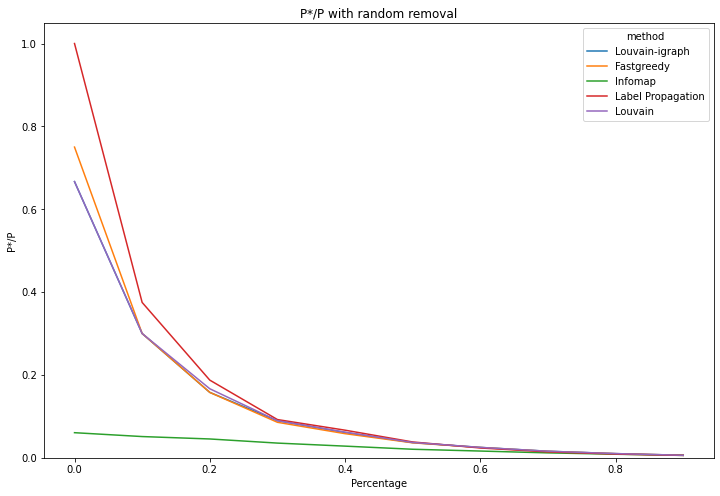

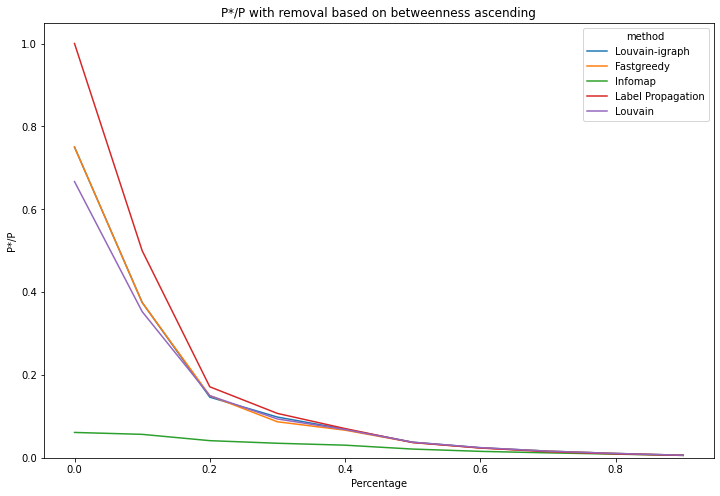

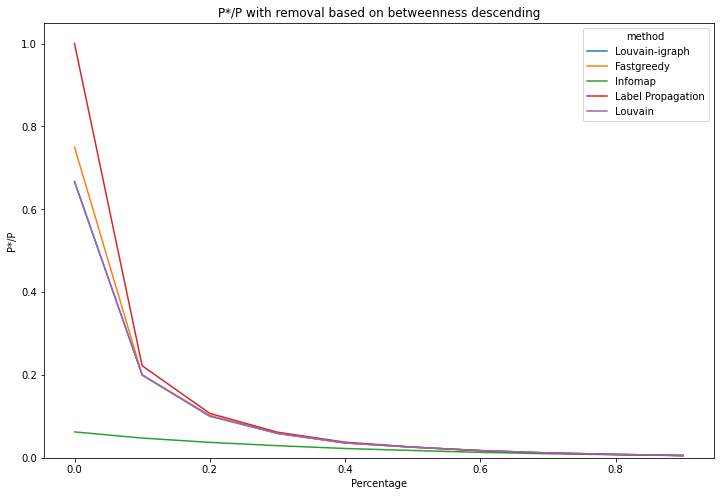

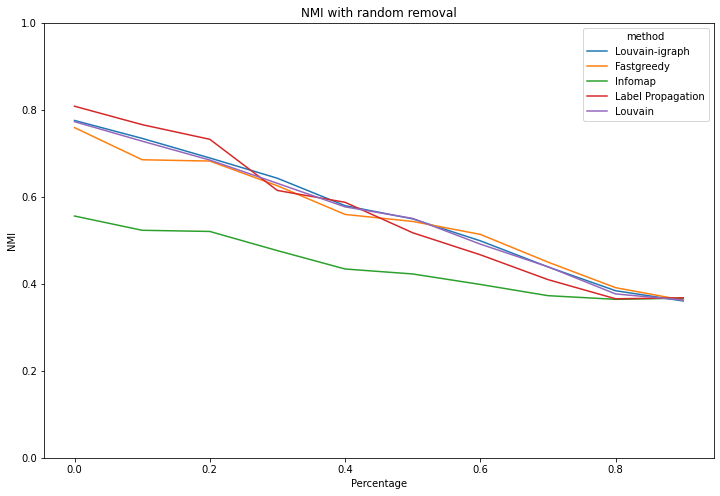

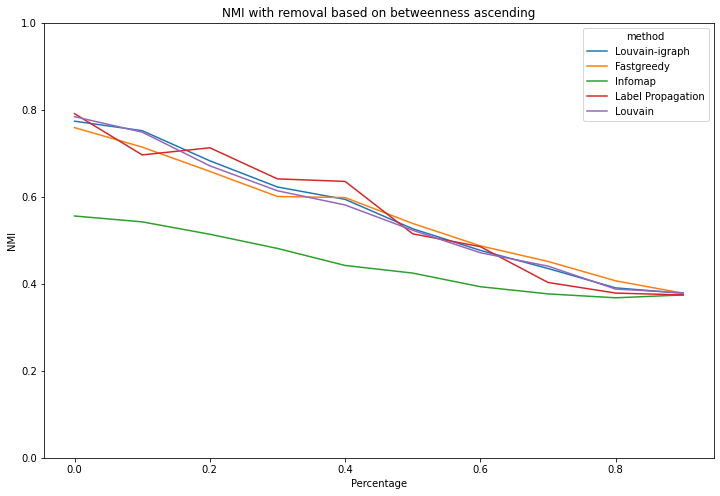

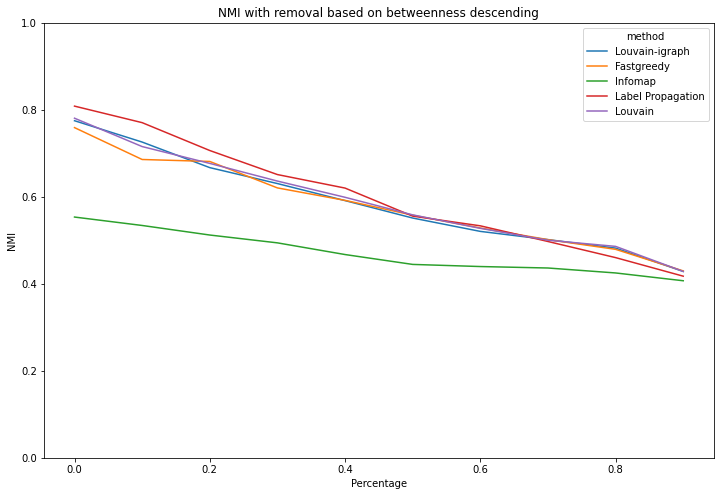

In [10]:
# This for cycle is for visualization only

for metric in ['P*/P','NMI']:
#for metric in metrics['metric'].unique():
    for modification in no_mod_results['modification'].unique():
#        for dataset in metrics['dataset'].unique():
        for dataset in ['Dancer 01']:
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = no_mod_results[(no_mod_results['metric'] == metric) &
                                   (no_mod_results['modification'] == modification) &
                                   (no_mod_results['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')
                
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

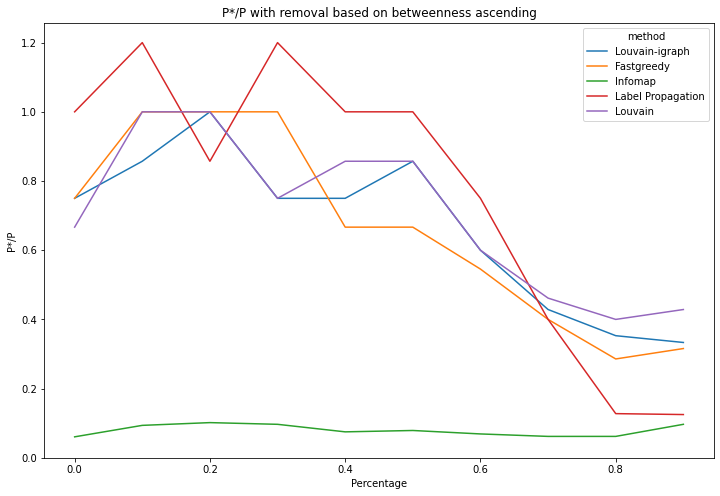

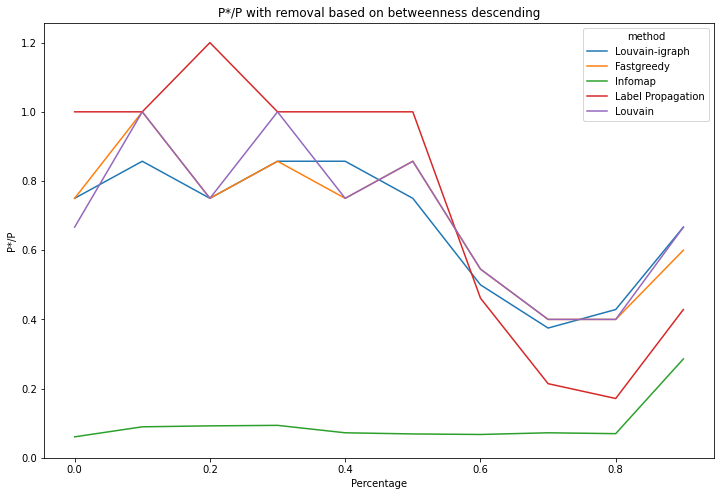

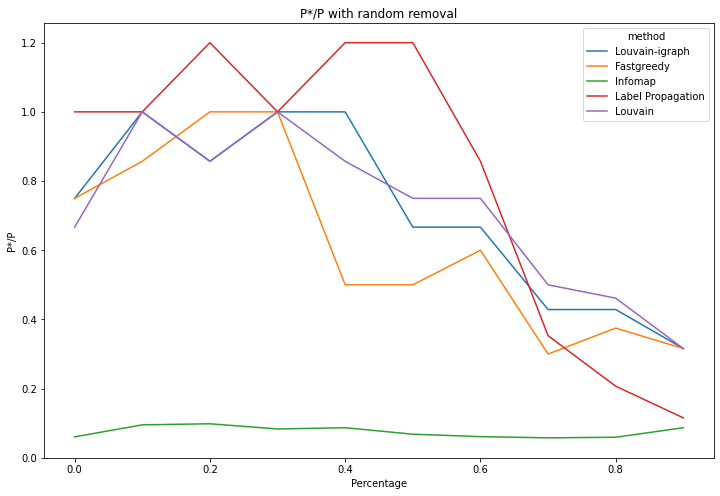

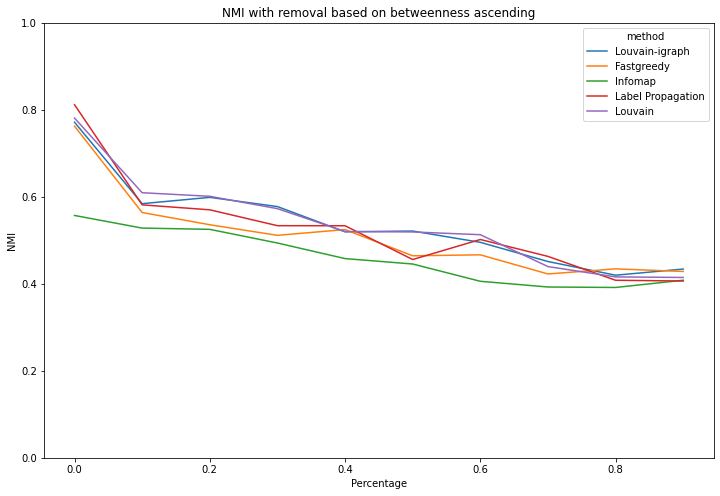

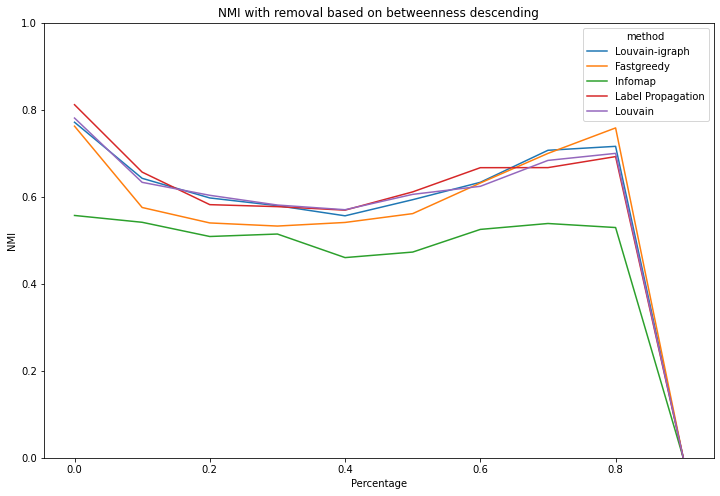

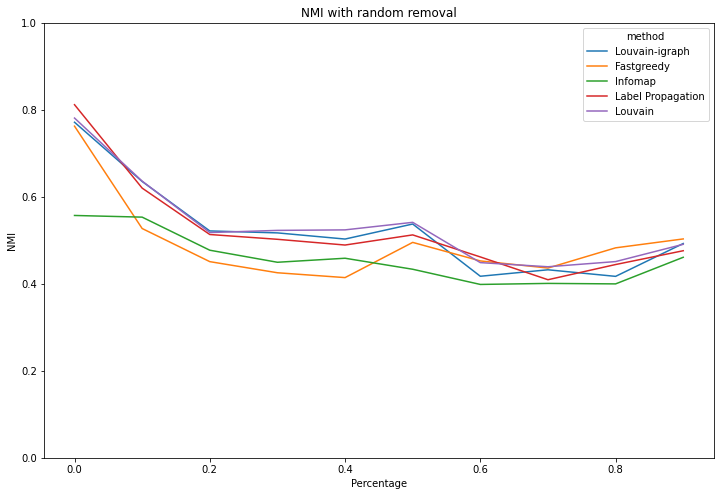

In [11]:
# This for cycle is for visualization only

results = add_edges_results
#results = add_weighted_results
#results = add_all_w_results


for metric in ['P*/P','NMI']:
#for metric in metrics['metric'].unique():
    for modification in ['betweenness asc', 'betweenness desc', 'random asc']:
#        for dataset in metrics['dataset'].unique():
        for dataset in ['dancer_01']:
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = results[(results['metric'] == metric) &
                            (results['modification'] == modification) &
                            (results['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')
                
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

In [23]:
no_mod_results.head()

,dataset,modification,percentage,method,metric,value
0,Dancer 01,random asc,0.0,Louvain-igraph,P,9.000000
1,Dancer 01,random asc,0.0,Louvain-igraph,P*/P,0.666667
2,Dancer 01,random asc,0.0,Louvain-igraph,Modularity,0.649290
3,Dancer 01,random asc,0.0,Louvain-igraph,NMI,0.775724
4,Dancer 01,random asc,0.0,Fastgreedy,P,8.000000


In [24]:
add_edges_results.head()

,dataset,file_name,method,metric,value,pct,modification
0,dancer_01,base.txt,Louvain-igraph,P,6.000000,0.0,base
1,dancer_01,base.txt,Louvain-igraph,P*/P,1.000000,0.0,base
2,dancer_01,base.txt,Louvain-igraph,Modularity,0.555529,0.0,base
3,dancer_01,base.txt,Louvain-igraph,NMI,0.594114,0.0,base
4,dancer_01,base.txt,Fastgreedy,P,7.000000,0.0,base


In [31]:
results = add_edges_results
# Filter: dataset, metric
# Join: method, modification, pct
comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])
comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']

comparison

,dataset,modification,pct,method,metric,value_no_change,value_change,pct_change
0,dancer_01,random asc,0.0,Louvain-igraph,P*/P,0.666667,1.000000,0.500000
1,dancer_01,random asc,0.0,Louvain-igraph,NMI,0.775724,0.594114,-0.234116
2,dancer_01,random asc,0.0,Fastgreedy,P*/P,0.750000,0.857143,0.142857
3,dancer_01,random asc,0.0,Fastgreedy,NMI,0.759245,0.503781,-0.336472
4,dancer_01,random asc,0.0,Infomap,P*/P,0.060606,0.105263,0.736842
...,...,...,...,...,...,...,...,...
295,dancer_01,betweenness desc,0.9,Infomap,NMI,0.407105,0.000000,-1.000000
296,dancer_01,betweenness desc,0.9,Label Propagation,P*/P,0.005372,2.000000,371.333333
297,dancer_01,betweenness desc,0.9,Label Propagation,NMI,0.417631,0.000000,-1.000000
298,dancer_01,betweenness desc,0.9,Louvain,P*/P,0.005505,0.545455,98.090909


In [32]:
comparison[comparison['metric']=='NMI'].to_csv('seal_nmi.csv')

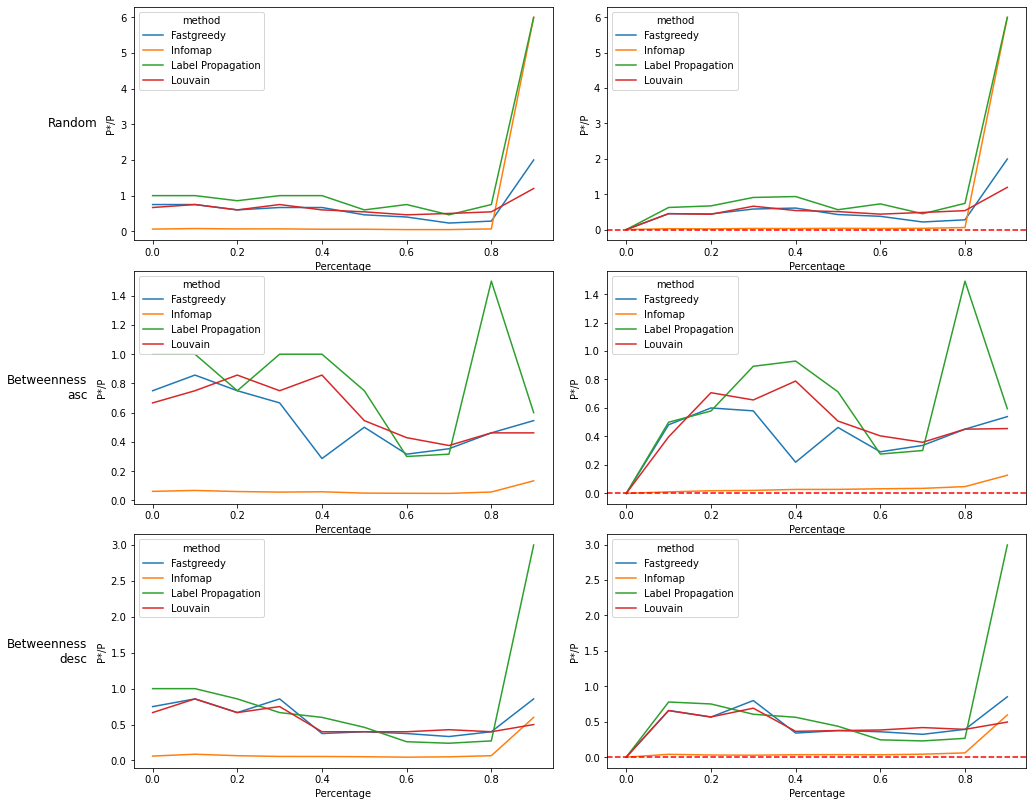

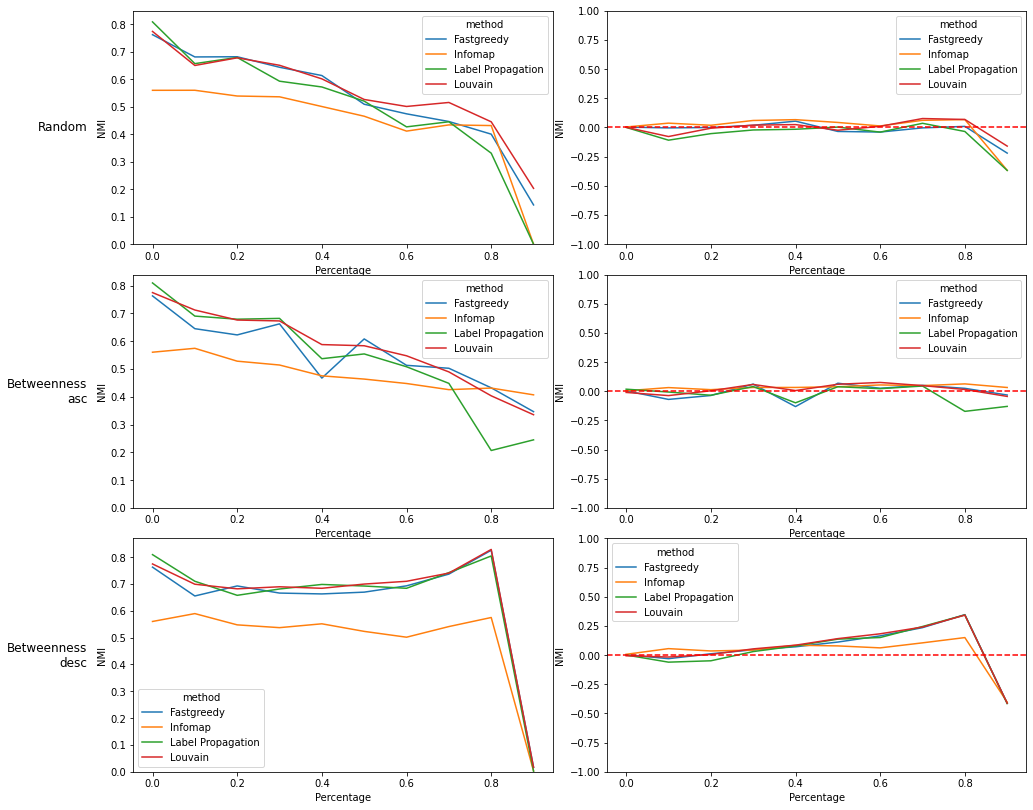

In [49]:
# This for cycle is for visualization only

results = add_edges_results
#results = add_weighted_results
#results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
#comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) #/ comparison['value_no_change']
comparison = comparison[comparison['method'] != 'Louvain-igraph']




for metric in ['P*/P','NMI']:
    fig, ax = plt.subplots(ncols=2, nrows=3,figsize=(16,14))
    space = 0.13
    plt.subplots_adjust(wspace=space, hspace=space)
    i = 0
    for modification in ['random asc', 'betweenness asc','betweenness desc']:
        for dataset in ['dancer_01']:
            c_ax = ax[i]
            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value_change', hue='method',ax=c_ax[0])
            sns.lineplot(data=data, x='pct', y='pct_change', hue='method',ax=c_ax[1])
            
            for j in range(0,2):
                c_ax[j].set_ylabel(metric)
                c_ax[j].set_xlabel('Percentage')

            if metric == 'NMI':
                c_ax[0].set_ybound(lower=0)
                c_ax[1].set_ybound(upper=1, lower=-1)

            if modification == 'betweenness asc':
                y_label = 'Betweenness\nasc'
            elif modification == 'betweenness desc':
                y_label = 'Betweenness\ndesc'
            else:
                y_label = 'Random'
            c_ax[0].annotate(y_label, xy=(0, 0.5), xytext=(-c_ax[0].yaxis.labelpad - 5, 0),
            xycoords=c_ax[0].yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center')
                            
            c_ax[1].axhline(y=0.0, color='r', linestyle='--')
                
        i += 1
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

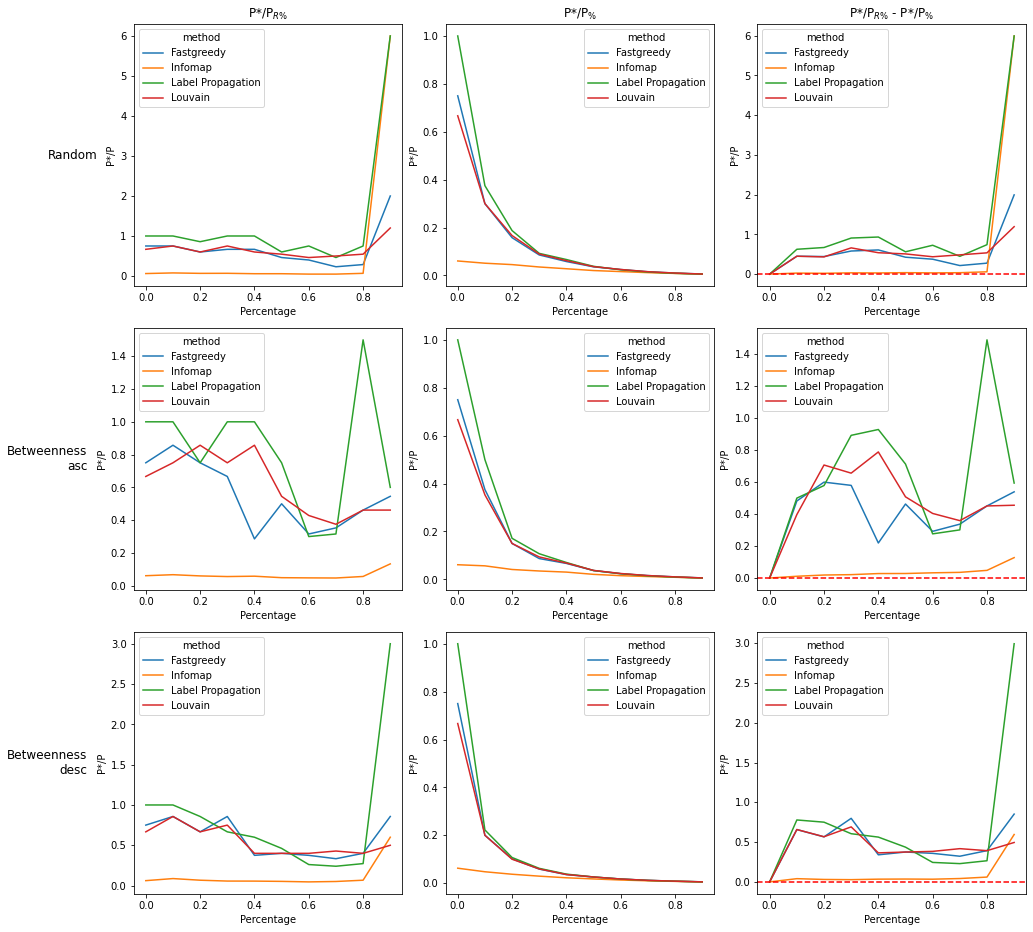

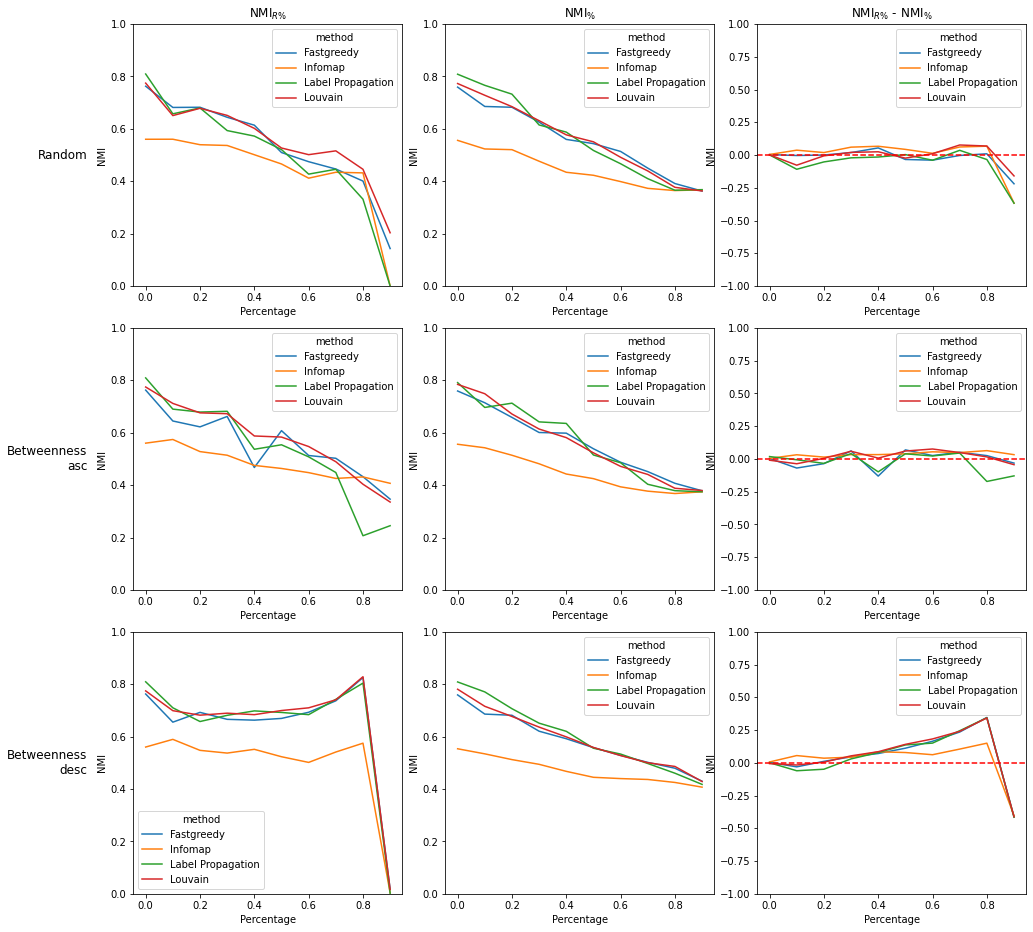

In [50]:
# This for cycle is for visualization only
# Most recent type of graph

results = add_edges_results
#results = add_weighted_results
#results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change'])
comparison = comparison[comparison['method'] != 'Louvain-igraph']




for metric in ['P*/P','NMI']:
    fig, ax = plt.subplots(ncols=3, nrows=3,figsize=(16,16))
    space = 0.16
    plt.subplots_adjust(wspace=space, hspace=space)
    i = 0
    for modification in ['random asc', 'betweenness asc','betweenness desc']:
        for dataset in ['dancer_01']:
            c_ax = ax[i]

            if i == 0:
                c_ax[0].set_title(metric+'$_{R\%}$')
                c_ax[1].set_title(metric+'$_{\%}$')
                c_ax[2].set_title(metric+'$_{R\%}$'+' - '+metric+'$_{\%}$')

            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            sns.lineplot(data=data, x='pct', y='value_change', hue='method',ax=c_ax[0])
            sns.lineplot(data=data, x='pct', y='value_no_change', hue='method',ax=c_ax[1])
            sns.lineplot(data=data, x='pct', y='pct_change', hue='method',ax=c_ax[2])
            
            for j in range(0,3):
                c_ax[j].set_ylabel(metric)
                c_ax[j].set_xlabel('Percentage')

            if metric == 'NMI':
                c_ax[0].set_ybound(upper=1,lower=0)
                c_ax[1].set_ybound(upper=1,lower=0)
                c_ax[2].set_ybound(upper=1, lower=-1)

            if modification == 'betweenness asc':
                y_label = 'Betweenness\nasc'
            elif modification == 'betweenness desc':
                y_label = 'Betweenness\ndesc'
            else:
                y_label = 'Random'
                
            c_ax[0].annotate(y_label, xy=(0, 0.5), xytext=(-c_ax[0].yaxis.labelpad - 5, 0),
            xycoords=c_ax[0].yaxis.label, textcoords='offset points',
            size='large', ha='right', va='center')
                            
            c_ax[2].axhline(y=0.0, color='r', linestyle='--')
                
        i += 1
            #filename = dataset+'_'+modification+'_'+metric+'.png'
            #filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            #plt.savefig(results_folder+filename)

In [6]:
# This for cycle is for generating the latex tables

#results = add_edges_results
#results = add_weighted_results
results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
#comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change'])
comparison = comparison[comparison['method'] != 'Louvain-igraph']



for metric in ['NMI']:
#for metric in ['P*/P']:
#for metric in metrics['metric'].unique():
    for modification in ['random asc','betweenness asc','betweenness desc']:
#        for dataset in metrics['dataset'].unique():
        for dataset in ['dancer_01']:
            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            data = data[['pct','method','pct_change']]
            data = data.pivot(index="pct", columns="method", values="pct_change").reset_index()
            print('------------------------------------------------------------')
            #print(metric,modification)
            print('\\begin{table}[H]')
            print(data.to_latex(index=False, float_format="{0:.2%}".format))
            print('\caption{Change of '+metric+' with random removal for '+dataset+'.}')
            print('\\end{table}')
            print('------------------------------------------------------------')

------------------------------------------------------------
\begin{table}[H]
\begin{tabular}{rrrrr}
\toprule
   pct &  Fastgreedy &  Infomap &  Label Propagation &  Louvain \\
\midrule
 0.00\% &       0.34\% &   -0.17\% &             -1.46\% &   -0.76\% \\
10.00\% &      -0.37\% &    3.88\% &             -9.89\% &   -6.29\% \\
20.00\% &      -0.00\% &    1.39\% &             -4.10\% &   -1.79\% \\
30.00\% &       1.86\% &    5.84\% &              2.53\% &    2.56\% \\
40.00\% &       5.43\% &    6.94\% &              1.02\% &    2.95\% \\
50.00\% &      -3.40\% &    4.73\% &             -1.98\% &   -2.88\% \\
60.00\% &      -3.91\% &    0.77\% &              1.91\% &   -1.36\% \\
70.00\% &      -0.34\% &    5.87\% &              2.25\% &    7.53\% \\
80.00\% &       0.94\% &    6.83\% &             -5.84\% &    7.50\% \\
90.00\% &     -21.96\% &  -36.71\% &            -36.78\% &  -18.94\% \\
\bottomrule
\end{tabular}

\caption{Change of NMI with random removal for dancer_01.}
\end{tab

In [67]:
metrics['metric'].unique()

NameError: name 'metrics' is not defined

In [47]:
# This for cycle is for generating the latex tables

#results = add_edges_results
#results = add_weighted_results
results = add_all_w_results

comparison = pd.merge(no_mod_results[(no_mod_results['dataset']=='Dancer 01') & 
                                     (no_mod_results['metric'].isin(['NMI','P*/P']))],
                      results[(results['dataset']=='dancer_01') & (results['modification']!='base')],
                      on=['method','metric','pct','modification'])

comparison = comparison[['dataset_y','modification','pct','method','metric','value_x','value_y']]
comparison = comparison.rename(columns={'dataset_y':'dataset', 'value_x':'value_no_change', 'value_y':'value_change'})
#comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change']) / comparison['value_no_change']
comparison['pct_change'] = (comparison['value_change'] - comparison['value_no_change'])
comparison = comparison[comparison['method'] != 'Louvain-igraph']



for metric in ['NMI']:
#for metric in metrics['metric'].unique():
    for modification in ['betweenness asc','betweenness desc','random asc']:
#        for dataset in metrics['dataset'].unique():
        for dataset in ['dancer_01']:
            data = comparison[(comparison['metric'] == metric) &
                            (comparison['modification'] == modification) &
                            (comparison['dataset'] == dataset)]
            data = data[['pct','method','pct_change']]
            data = data.pivot(index="pct", columns="method", values="pct_change").reset_index()
            print('------------------------------------------------------------')
            print(metric,modification)
            #print(data.to_latex(index=False, float_format="{0:.0%}".format))
            print(data)
            print('------------------------------------------------------------')

------------------------------------------------------------
NMI betweenness asc
method  pct  Fastgreedy   Infomap  Label Propagation   Louvain
0       0.0    0.003396  0.004510          -0.001041 -0.006548
1       0.1   -0.069646  0.034718          -0.001925 -0.041467
2       0.2   -0.036164  0.011383          -0.032953  0.003939
3       0.3    0.061254  0.043384           0.028300  0.053683
4       0.4   -0.131152  0.031135          -0.112445 -0.000372
5       0.5    0.069145  0.042972           0.038582  0.062203
6       0.6    0.025751  0.051332           0.017850  0.062512
7       0.7    0.050922  0.047548           0.023315  0.052605
8       0.8    0.025192  0.067150          -0.067574  0.023891
9       0.9   -0.031983  0.029232          -0.100197 -0.036782
------------------------------------------------------------
------------------------------------------------------------
NMI betweenness desc
method  pct  Fastgreedy   Infomap  Label Propagation   Louvain
0       0.0    0.003

In [11]:
thresholds = threshold_scores.copy()

thresholds['modification'] = thresholds['file_name'].apply(lambda x: 'base' if x.startswith('base') else
                                                          'Betweenness ascending' if x.startswith('bet_asc') else
                                                          'Betweenness descending' if x.startswith('bet_desc') else
                                                          'Random')

thresholds['percentage'] = thresholds['file_name'].apply(lambda x: 0 if x.startswith('base') else
                                                          float(x[-6:][:2])*0.1)


for mod in ['Random', 'Betweenness descending', 'Betweenness ascending']:
    base = thresholds[thresholds['modification']=='base'].copy()
    base['modification'] = mod
    thresholds = pd.concat([thresholds ,base], ignore_index=True)

thresholds = thresholds[thresholds['modification'] != 'base']
thresholds

,file_name,train_f1_score,test_f1_score,exists_f1_score,exists_all_f1_score,modification,percentage
0,bet_asc_01.txt,0.999583,0.146933,0.154123,0.706052,Betweenness ascending,0.1
1,bet_asc_02.txt,0.999765,0.128778,0.136986,0.658893,Betweenness ascending,0.2
2,bet_asc_03.txt,0.962850,0.116937,0.115668,0.586875,Betweenness ascending,0.3
3,bet_asc_04.txt,0.999843,0.154460,0.155981,0.579488,Betweenness ascending,0.4
4,bet_asc_05.txt,0.990313,0.160675,0.138560,0.514659,Betweenness ascending,0.5
5,bet_asc_06.txt,0.999765,0.184566,0.146214,0.467623,Betweenness ascending,0.6
6,bet_asc_07.txt,0.999052,0.266765,0.174765,0.415438,Betweenness ascending,0.7
7,bet_asc_08.txt,0.999513,0.493827,0.242454,0.373646,Betweenness ascending,0.8
8,bet_asc_09.txt,0.998875,0.835165,0.292264,0.340559,Betweenness ascending,0.9
9,bet_desc_01.txt,0.976183,0.133694,0.134231,0.685912,Betweenness descending,0.1


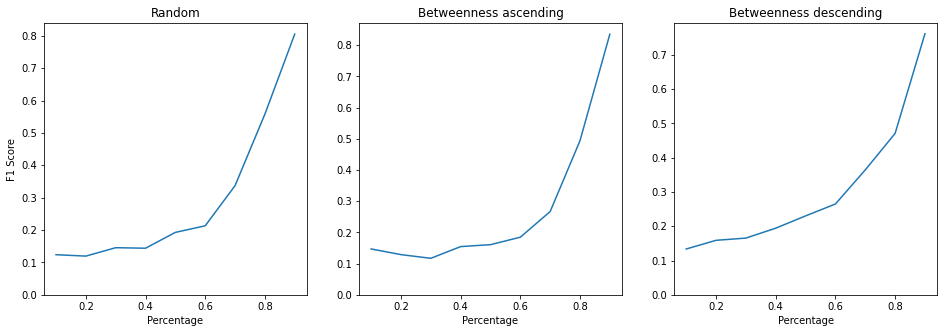

In [51]:
fig, ax = plt.subplots(ncols=3, nrows=1,figsize=(16,5))
i = 0
for mod in ['Random', 'Betweenness ascending', 'Betweenness descending']:
    sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='test_f1_score',ax=ax[i])
    #sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='train_f1_score',ax=ax[i])
    ax[i].set_ylabel(None)
    ax[i].set_xlabel('Percentage')
    ax[i].set_title(mod)
    ax[i].set_ybound(lower=0)
    i += 1
ax[0].set_ylabel('F1 Score')
plt.show()

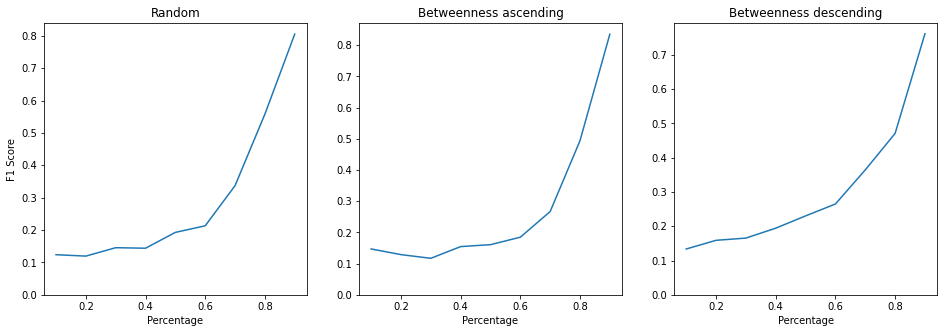

In [52]:
fig, ax = plt.subplots(ncols=3, nrows=1,figsize=(16,5))
i = 0
for mod in ['Random', 'Betweenness ascending', 'Betweenness descending']:
    sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='test_f1_score',ax=ax[i])
    #sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='train_f1_score',ax=ax[i])
    ax[i].set_ylabel(None)
    ax[i].set_xlabel('Percentage')
    ax[i].set_title(mod)
    ax[i].set_ybound(lower=0)
    i += 1
ax[0].set_ylabel('F1 Score')
plt.show()

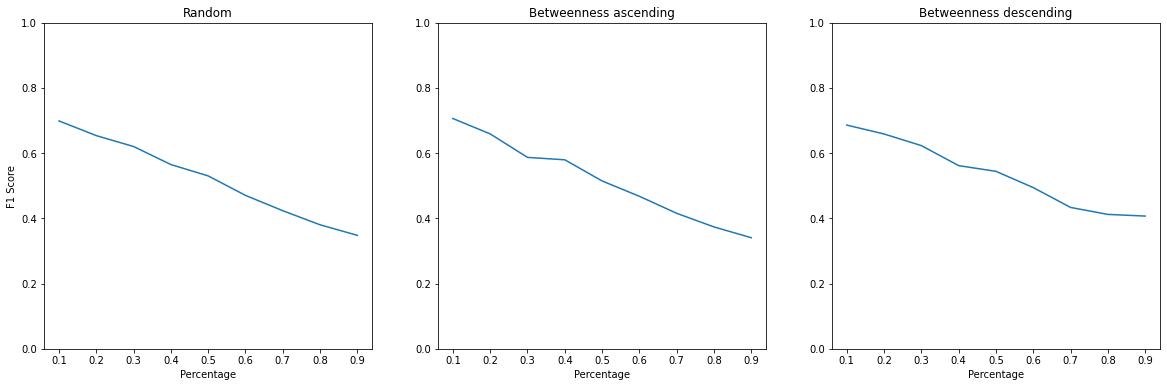

In [53]:
fig, ax = plt.subplots(ncols=3, nrows=1,figsize=(20,6))
i = 0
for mod in ['Random', 'Betweenness ascending', 'Betweenness descending']:
    sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='exists_all_f1_score',ax=ax[i])
    #sns.lineplot(data=thresholds[thresholds['modification'] == mod], x='percentage', y='exists_f1_score',ax=ax[i])
    ax[i].set_ylabel(None)
    ax[i].set_xlabel('Percentage')
    ax[i].set_title(mod)
    ax[i].set_ybound(upper=1, lower=0)
    i += 1
ax[0].set_ylabel('F1 Score')
plt.show()

In [72]:
thresholds

,file_name,threshold,train_f1_score,test_f1_score,modification,percentage
1,bet_asc_01.txt,0.841456,0.276171,0.292767,Betweenness ascending,0.1
2,bet_asc_02.txt,0.852002,0.267642,0.266135,Betweenness ascending,0.2
3,bet_asc_03.txt,0.850175,0.295462,0.286986,Betweenness ascending,0.3
4,bet_asc_04.txt,0.878560,0.322051,0.312019,Betweenness ascending,0.4
5,bet_asc_05.txt,0.869041,0.361602,0.358761,Betweenness ascending,0.5
6,bet_asc_06.txt,0.879436,0.396396,0.385355,Betweenness ascending,0.6
7,bet_asc_07.txt,0.894064,0.527883,0.517413,Betweenness ascending,0.7
8,bet_asc_08.txt,0.928808,0.669008,0.641176,Betweenness ascending,0.8
9,bet_asc_09.txt,0.931913,0.798337,0.759615,Betweenness ascending,0.9
10,bet_desc_01.txt,0.852435,0.277805,0.264116,Betweenness descending,0.1
